# V255. Röntgenspektrometer

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2

### A. Messung des Röntgenspektrums mit einem LiF-Kristall

#### (1) Berechnung d. Planck-Konstante durch Grenzwellenlänge

Grenzwinkel: θ_grenz = (4.72 ± 0.13)°


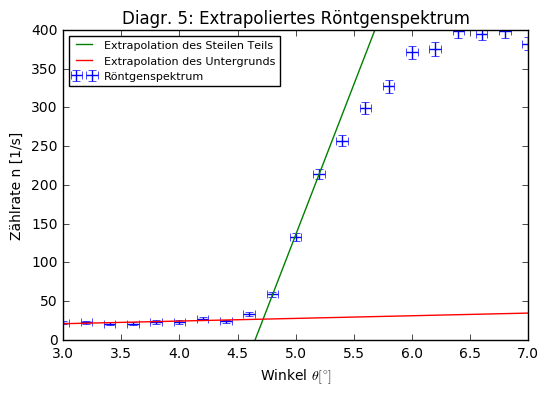

In [3]:
#Importieren der Messdaten

α, n = np.loadtxt('/home/jan/Dokumente/SS 2018/PAP 2.2/V255/LiFspektrum.dat', unpack = True)

err_α = 0.05 #Fehler des Winkels: 0.05°
err_n = np.sqrt(n*5)/5 #Fehler der Zählrate

#Fitfunktion

def linear(x,m,c):
    return m*x + c

popt, pcov = curve_fit(linear, α[9:12], n[9:12]) #Steiler Teil
popt1, pcov1 = curve_fit(linear, α[:7], n[:7]) #Untergrund

m = popt[0]
merr = np.sqrt(pcov[0,0])
c = popt [1]
cerr = np.sqrt(pcov[1,1])
m1 = popt1[0]
merr1 = np.sqrt(pcov1[0,0])
c1 = popt1 [1]
cerr1 = np.sqrt(pcov1[1,1])


#Plot

plt.title('Diagr. 5: Extrapoliertes Röntgenspektrum')
plt.ylabel('Zählrate n [1/s]')
plt.xlabel('Winkel $\\theta [ ^{\\circ}]$')
plt.errorbar(α, n, xerr = err_α, yerr = err_n, linestyle = 'none', label = 'Röntgenspektrum')
plt.plot(α,linear(α, *popt), label = 'Extrapolation des Steilen Teils')
plt.plot(α, linear(α, *popt1), label = 'Extrapolation des Untergrunds')
plt.legend(loc = 'upper left', prop = {'size': 8})
plt.xlim(3,7)
plt.ylim(0, 400)
plt.savefig('V255_Diagr.5.jpeg', format ='jpeg', dpi = 500)


#Grenzwinkel

θ_grenz = (popt[1]-popt1[1])/(popt1[0]-popt[0]) #Grenzwinkel
err_θ_grenz = θ_grenz*np.sqrt((np.sqrt(cerr**2+cerr1**2)/(popt[1]-popt1[1])**2)**2 
                              + (np.sqrt(merr**2+merr1**2)/(popt[0] - popt1[0]))**2)

print('Grenzwinkel: θ_grenz = ({a:.2f} ± {b:.2f})°'.format(a = θ_grenz, b = err_θ_grenz))

#### (2) Bestimmung d. Lage der Kα- und Kβ-Linien

Gauß-Fit der Kα-Linie:
A_α = 432.123 ± 20.659
μ_α = 9.985 ± 0.005
σ_α = 0.117 ± 0.005
χ²_α = 505.460485139
χ²_red_α = 72.2086407341

Gauß-Fit der Kβ-Linie:
A_β = 129.801 ± 6.646
μ_β = 8.821 ± 0.005
σ_β = 0.122 ± 0.006
χ²_β = 68.1391272864
χ²_red_β = 72.2086407341

Peak Kα 1. Ordnung: θ = (9.985 ± 0.005)°
Peak Kβ 1. Ordnung: θ = (8.821 ± 0.005)°


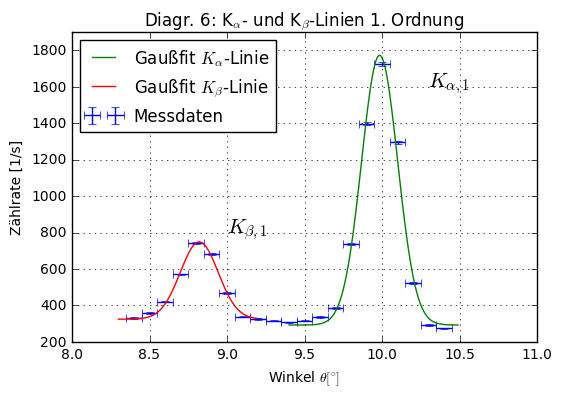

In [4]:
#Kα- und Kβ-Linien 1. Ordnung

β, N = np.loadtxt('//home/jan/Dokumente/SS 2018/PAP 2.2/V255/LiFpeaks.dat', unpack = True)

err_β = 0.05
err_N = np.sqrt(20*N)/20


#Fitfunktion

def gaussian(x, A, μ, σ, y): #A = Fläche der Gaußfunktion
    return A/(np.sqrt((2*np.pi))*σ)*np.exp(-(x-μ)**2/2/σ**2) + y

popt_kα, pcov_kα = curve_fit(gaussian, β[11:], N[11:], p0 = [1200,10,1,300], sigma = err_N[11:])

χ2_kα = np.sum((gaussian(β[11:], *popt_kα) - N[11:])**2/err_N[11:]**2)
dof_kα = len(β[11:]) - 3 
χ2red_kα = χ2_kα/dof_kα

#Ausgabe der Fitparameter

print("Gauß-Fit der Kα-Linie:")
print("A_α = {:.3f} ± {:.3f}" .format(popt_kα[0], np.sqrt(pcov_kα[0,0])))
print("μ_α = {:.3f} ± {:.3f}" .format(popt_kα[1], np.sqrt(pcov_kα[1,1])))
print("σ_α = {:.3f} ± {:.3f}" .format(popt_kα[2], np.sqrt(pcov_kα[2,2])))
print("χ²_α =", χ2_kα)
print("χ²_red_α =", χ2red_kα)
print()

popt_kβ, pcov_kβ = curve_fit(gaussian, β[0:10], N[0:10], p0 =[1200,9,0.5,300], sigma = err_N[0:10])

χ2_kβ = np.sum((gaussian(β[0:10], *popt_kβ) - N[0:10])**2/err_N[0:10]**2)
dof_kβ = len(β[0:10]) - 3 
χ2red_kβ = χ2_kβ/dof_kβ


#Ausgabe der Fitparameter

print("Gauß-Fit der Kβ-Linie:")
print("A_β = {:.3f} ± {:.3f}" .format(popt_kβ[0], np.sqrt(pcov_kβ[0,0])))
print("μ_β = {:.3f} ± {:.3f}" .format(popt_kβ[1], np.sqrt(pcov_kβ[1,1])))
print("σ_β = {:.3f} ± {:.3f}" .format(popt_kβ[2], np.sqrt(pcov_kβ[2,2])))
print("χ²_β =", χ2_kβ)
print("χ²_red_β =", χ2red_kα)


#Plot

plt.title('Diagr. 6: K$_\\alpha$- und K$_\\beta$-Linien 1. Ordnung')
plt.ylabel('Zählrate [1/s]')
plt.xlabel('Winkel $\\theta [^{\circ}]$')
plt.errorbar(β, N, yerr = err_N, xerr = err_β, linestyle = 'none', label = 'Messdaten')
x_kα = np.arange(9.4, 10.5, 0.01)
x_kβ = np.arange(8.3, 9.2, 0.01)
plt.plot(x_kα, gaussian(x_kα, *popt_kα), label = 'Gaußfit $K_\\alpha$-Linie')
plt.plot(x_kβ, gaussian(x_kβ, *popt_kβ), label = 'Gaußfit $K_\\beta$-Linie')
plt.grid()
plt.text(9,800, '$K_{\\beta,1}$', fontsize = 15)
plt.text(10.3,1600, '$K_{\\alpha,1}$', fontsize = 15)
plt.legend(loc = 'best')
plt.xlim(8,11)
plt.ylim(200,1900)
plt.savefig('V255_Diagr.6.jpeg', format = 'jpeg', dpi = 600)


#Winkel der Peaks

print()
print('Peak Kα 1. Ordnung: θ = ({:.3f} ± {:.3f})°' .format(popt_kα[1], np.sqrt(pcov_kα[1,1])))
print('Peak Kβ 1. Ordnung: θ = ({:.3f} ± {:.3f})°' .format(popt_kβ[1], np.sqrt(pcov_kβ[1,1])))

Gauß-Fit der Kα-Linie:
A_α = 73.055 ± 2.222
μ_α = 20.637 ± 0.004
σ_α = 0.124 ± 0.004
χ²_α = 46.8753595465
χ²_red_α = 4.68753595465

Gauß-Fit der Kβ-Linie:
A_β = 18.335 ± 2.327
μ_β = 18.265 ± 0.012
σ_β = 0.106 ± 0.013
χ²_β = 73.1144645073
χ²_red_β = 4.68753595465

Peak Kα 2. Ordnung: θ = (20.637 ± 0.004)°
Peak Kβ 2. Ordnung: θ = (18.265 ± 0.012)°


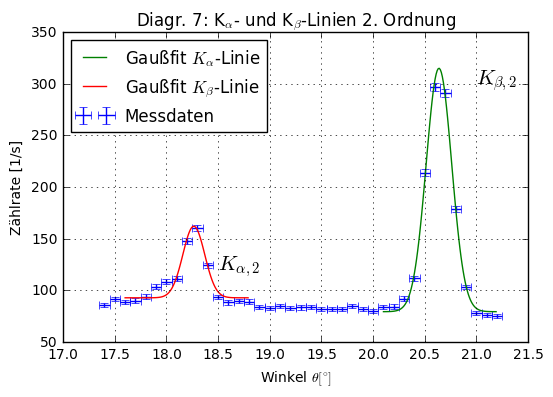

In [5]:
#Kα- und Kβ-Linien 2. Ordnung

β, N = np.loadtxt('//home/jan/Dokumente/SS 2018/PAP 2.2/V255/LiFpeaks2.dat', unpack = True)

err_β = 0.05
err_N = np.sqrt(N*20)/20


#Fitfunktion

def gaussian(x, A, μ, σ, y): #A = Fläche der Gaußfunktion
    return A/(np.sqrt((2*np.pi))*σ)*np.exp(-(x-μ)**2/2/σ**2) + y

popt_kα, pcov_kα = curve_fit(gaussian, β[26:], N[26:], p0 = [100,20.7,1,50], sigma = err_N[26:])

χ2_kα = np.sum((gaussian(β[26:], *popt_kα) - N[26:])**2/err_N[26:]**2)
dof_kα = len(β[26:]) - 3 
χ2red_kα = χ2_kα/dof_kα

popt_kβ, pcov_kβ = curve_fit(gaussian, β[2:14], N[2:14], p0 = [500,18.3,1,70], sigma = err_N[2:14])

χ2_kβ = np.sum((gaussian(β[2:14], *popt_kβ) - N[2:14])**2/err_N[2:14]**2)
dof_kβ = len(β[2:14]) - 3 
χ2red_kβ = χ2_kβ/dof_kβ

#Ausgabe der Fitparameter

print("Gauß-Fit der Kα-Linie:")
print("A_α = {:.3f} ± {:.3f}" .format(popt_kα[0], np.sqrt(pcov_kα[0,0])))
print("μ_α = {:.3f} ± {:.3f}" .format(popt_kα[1], np.sqrt(pcov_kα[1,1])))
print("σ_α = {:.3f} ± {:.3f}" .format(popt_kα[2], np.sqrt(pcov_kα[2,2])))
print("χ²_α =", χ2_kα)
print("χ²_red_α =", χ2red_kα)
print()

print("Gauß-Fit der Kβ-Linie:")
print("A_β = {:.3f} ± {:.3f}" .format(popt_kβ[0], np.sqrt(pcov_kβ[0,0])))
print("μ_β = {:.3f} ± {:.3f}" .format(popt_kβ[1], np.sqrt(pcov_kβ[1,1])))
print("σ_β = {:.3f} ± {:.3f}" .format(popt_kβ[2], np.sqrt(pcov_kβ[2,2])))
print("χ²_β =", χ2_kβ)
print("χ²_red_β =", χ2red_kα)
print()


#Plot

plt.title('Diagr. 7: K$_\\alpha$- und K$_\\beta$-Linien 2. Ordnung')
plt.ylabel('Zählrate [1/s]')
plt.xlabel('Winkel $\\theta [^{\circ}]$')
plt.errorbar(β, N, yerr = err_N, xerr = err_β, linestyle = 'none', label = 'Messdaten')
x_kα = np.arange(20.1, 21.2, 0.01)
x_kβ = np.arange(17.6, 18.8,0.01)
plt.plot(x_kα, gaussian(x_kα, *popt_kα), label = 'Gaußfit $K_\\alpha$-Linie')
plt.plot(x_kβ, gaussian(x_kβ, *popt_kβ), label = 'Gaußfit $K_\\beta$-Linie')
plt.grid()
plt.text(21,300, '$K_{\\beta,2}$', fontsize = 15)
plt.text(18.5,120, '$K_{\\alpha,2}$', fontsize = 15)
plt.legend(loc = 'best')
plt.savefig('V255_Diagr.7.jpeg', format = 'jpeg', dpi = 600)


#Winkel der Peaks

print('Peak Kα 2. Ordnung: θ = ({:.3f} ± {:.3f})°' .format(popt_kα[1], np.sqrt(pcov_kα[1,1])))
print('Peak Kβ 2. Ordnung: θ = ({:.3f} ± {:.3f})°' .format(popt_kβ[1], np.sqrt(pcov_kβ[1,1])))

#### c) Bestimmung d. Planck'schen Wirkungsquantums durch Extrapolation d. Einsatzspannung

Geradensteigung: m = 31.601 ± 0.533
y-Achsenabschnitt: -694.047 ± 15.586
Einsatzspannung: U_E = (21.96 ± 0.62)kV


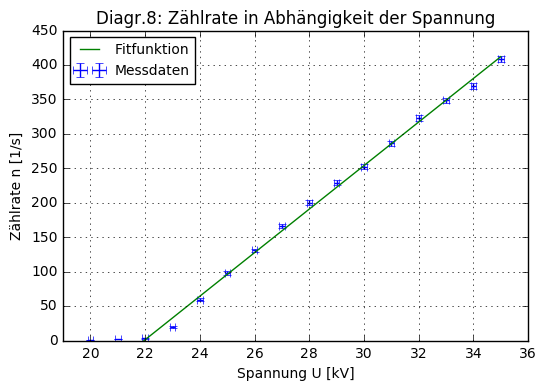

In [16]:
# Messdaten aus Tabelle 4 (Messprotokoll)

U = np.arange(20,36,1) #Eingangsspannung U[V]
n = np.array([1.05,2,3.3,19.6,59.4,98,130.7,166.7,200.1,229.2,252.2,286.3,322.6,348.4,369.4,408.4]) #Zählrate [1/s]
err_U = 0.1 #Fehler von U = 0.1kV
err_n = np.sqrt(n*20)/20 #Fehler der Zählrate


#Fitgerade

popt, pcov = curve_fit(linear,U[3:], n[3:])

x0 = -popt[1]/popt[0] #x-Achsenabschnitt
err_x0 = np.sqrt((np.sqrt(pcov[0,0])/popt[0])**2+(np.sqrt(pcov[1,1])/popt[1])**2)*x0 #Fehler x-Achsenabschnitt

print('Geradensteigung: m = {:.3f} ± {:.3f}'.format(popt[0],np.sqrt(pcov[0,0])))
print('y-Achsenabschnitt: {:.3f} ± {:.3f}'.format(popt[1],np.sqrt(pcov[1,1])))
print('Einsatzspannung: U_E = ({:.2f} ± {:.2f})kV'.format(x0, err_x0))


#Plot
plt.title('Diagr.8: Zählrate in Abhängigkeit der Spannung')
plt.ylabel('Zählrate n [1/s]')
plt.xlabel('Spannung U [kV]')
plt.xlim(19,36)
plt.ylim(0,450)
plt.errorbar(U, n, xerr = err_U, yerr = err_n, linestyle = 'none', label = 'Messdaten')
x = np.arange(19,36,1)
plt.plot(x, linear(x, *popt), color = 'g', label = 'Fitfunktion')
plt.grid()
plt.legend(loc='upper left', prop = {'size': 10})
plt.savefig('V255_Diagr.8.jpeg', format = 'jpeg', dpi = 500)

### B. Messung de Röntgenspektrums mit einem NaCl-Kristall

Gauß-Fit der Kα1-Linie:
A_α = 509.135 ± 48.616
μ_α = 7.117 ± 0.009
σ_α = 0.125 ± 0.015
χ²_α = 32.3051564253
χ²_red_2 = 16.1525782127

Gauß-Fit der Kβ1-Linie:
A_β = 201.359 ± 59.235
μ_β = 6.293 ± 0.025
σ_β = 0.151 ± 0.040
χ²_β = 33.4571766375
χ²_red_β = 36.5572322536

Gauß-Fit der Kα2-Linie:
A_α = 142.202 ± 7.371
μ_α = 14.469 ± 0.006
σ_α = 0.119 ± 0.007
χ²_α = 32.3051564253
χ²_red_2 = 16.1525782127

Gauß-Fit der Kβ2-Linie:
A_β = 38.018 ± 1.439
μ_β = 12.787 ± 0.004
σ_β = 0.114 ± 0.003
χ²_β = 33.4571766375
χ²_red_β = 16.1525782127

Peak Kα 1. Ordnung: θ = (7.117 ± 0.009)°
Peak Kβ 1. Ordnung: θ = (6.293 ± 0.025)°
Peak Kα 2. Ordnung: θ = (14.469 ± 0.006)°
Peak Kβ 2. Ordnung: θ = (12.787 ± 0.004)°


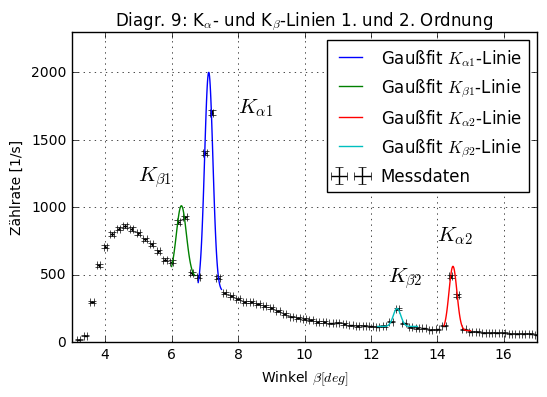

In [48]:
#Kα- und Kβ-Linien 1. Ordnung

β, N = np.loadtxt('/home/jan/Dokumente/SS 2018/PAP 2.2/V255/NaClspektrum.dat', skiprows = 1, unpack = True)

err_β = 0.05
err_N = np.sqrt(N*5)/5


#Fitfunktion

popt_kα2, pcov_kα2 = curve_fit(gaussian, β[18:23], N[18:23], p0 = [28600,7.2,0.15,600], sigma = err_N[18:23])
popt_kβ2, pcov_kβ2 = curve_fit(gaussian, β[14:19], N[14:19], p0 = [200,6.5,0.15,300], sigma = err_N[14:19])
popt_kα3, pcov_kα3 = curve_fit(gaussian, β[54:60], N[54:60], p0 = [7700,14.6,0.15,100], sigma = err_N[54:60])
popt_kβ3, pcov_kβ3 = curve_fit(gaussian, β[45:50], N[45:50], p0 = [2500,13,0.15,150], sigma = err_N[45:50])


χ2_kα2 = np.sum((gaussian(β[18:23], *popt_kα2) - N[18:23])**2/err_N[18:23]**2)
dof_kα2 = len(β[18:23]) - 3 
χ2red_kα2 = χ2_kα2/dof_kα2

χ2_kβ2 = np.sum((gaussian(β[14:19], *popt_kβ2) - N[14:19])**2/err_N[14:19]**2)
dof_kβ2 = len(β[14:19]) - 3 
χ2red_kβ2 = χ2_kβ/dof_kβ2

χ2_kα3 = np.sum((gaussian(β[54:60], *popt_kα2) - N[54:60])**2/err_N[54:60]**2)
dof_kα3 = len(β[54:60]) - 3 
χ2red_kα3 = χ2_kα3/dof_kα3

χ2_kβ3 = np.sum((gaussian(β[45:50], *popt_kβ2) - N[45:50])**2/err_N[45:50]**2)
dof_kβ3 = len(β[45:50]) - 3 
χ2red_kβ3 = χ2_kβ/dof_kβ3


#Ausgabe der Fitparameter

print("Gauß-Fit der Kα1-Linie:")
print("A_α = {:.3f} ± {:.3f}" .format(popt_kα2[0], np.sqrt(pcov_kα2[0,0])))
print("μ_α = {:.3f} ± {:.3f}" .format(popt_kα2[1], np.sqrt(pcov_kα2[1,1])))
print("σ_α = {:.3f} ± {:.3f}" .format(popt_kα2[2], np.sqrt(pcov_kα2[2,2])))
print("χ²_α =", χ2_kα2)
print("χ²_red_2 =", χ2red_kα2)
print()

print("Gauß-Fit der Kβ1-Linie:")
print("A_β = {:.3f} ± {:.3f}" .format(popt_kβ2[0], np.sqrt(pcov_kβ2[0,0])))
print("μ_β = {:.3f} ± {:.3f}" .format(popt_kβ2[1], np.sqrt(pcov_kβ2[1,1])))
print("σ_β = {:.3f} ± {:.3f}" .format(popt_kβ2[2], np.sqrt(pcov_kβ2[2,2])))
print("χ²_β =", χ2_kβ2)
print("χ²_red_β =", χ2red_kβ2)
print()

print("Gauß-Fit der Kα2-Linie:")
print("A_α = {:.3f} ± {:.3f}" .format(popt_kα3[0], np.sqrt(pcov_kα3[0,0])))
print("μ_α = {:.3f} ± {:.3f}" .format(popt_kα3[1], np.sqrt(pcov_kα3[1,1])))
print("σ_α = {:.3f} ± {:.3f}" .format(popt_kα3[2], np.sqrt(pcov_kα3[2,2])))
print("χ²_α =", χ2_kα2)
print("χ²_red_2 =", χ2red_kα2)
print()

print("Gauß-Fit der Kβ2-Linie:")
print("A_β = {:.3f} ± {:.3f}" .format(popt_kβ3[0], np.sqrt(pcov_kβ3[0,0])))
print("μ_β = {:.3f} ± {:.3f}" .format(popt_kβ3[1], np.sqrt(pcov_kβ3[1,1])))
print("σ_β = {:.3f} ± {:.3f}" .format(popt_kβ3[2], np.sqrt(pcov_kβ3[2,2])))
print("χ²_β =", χ2_kβ2)
print("χ²_red_β =", χ2red_kα2)
print()

#Winkel der Peaks

print('Peak Kα 1. Ordnung: θ = ({:.3f} ± {:.3f})°' .format(popt_kα2[1], np.sqrt(pcov_kα2[1,1])))
print('Peak Kβ 1. Ordnung: θ = ({:.3f} ± {:.3f})°' .format(popt_kβ2[1], np.sqrt(pcov_kβ2[1,1])))
print('Peak Kα 2. Ordnung: θ = ({:.3f} ± {:.3f})°' .format(popt_kα3[1], np.sqrt(pcov_kα3[1,1])))
print('Peak Kβ 2. Ordnung: θ = ({:.3f} ± {:.3f})°' .format(popt_kβ3[1], np.sqrt(pcov_kβ3[1,1])))



#Plot

#plt.plot(β,N)
x_kα1 = np.arange(6.8, 7.5, 0.01)
x_kβ1 = np.arange(6,6.7,0.01)
x_kα2 = np.arange(14.2, 15, 0.01)
x_kβ2 = np.arange(12.2,13.4,0.01)

plt.title('Diagr. 9: K$_\\alpha$- und K$_\\beta$-Linien 1. und 2. Ordnung')
plt.ylabel('Zählrate [1/s]')
plt.xlabel('Winkel $\\beta [deg]$')
plt.errorbar(β, N, yerr = err_N, xerr = err_β, label = 'Messdaten', linestyle = 'none', color = 'black')
plt.plot(x_kα1, gaussian(x_kα1, *popt_kα2), label = 'Gaußfit $K_{\\alpha1}$-Linie')
plt.plot(x_kβ1, gaussian(x_kβ1, *popt_kβ2), label = 'Gaußfit $K_{\\beta1}$-Linie')
plt.plot(x_kα2, gaussian(x_kα2, *popt_kα3), label = 'Gaußfit $K_{\\alpha2}$-Linie')
plt.plot(x_kβ2, gaussian(x_kβ2, *popt_kβ3), label = 'Gaußfit $K_{\\beta2}$-Linie')
plt.grid()
plt.xlim(3,17)
plt.ylim(0,2300)
plt.text(8,1700, '$K_{\\alpha1}$', fontsize = 15)
plt.text(5,1200, '$K_{\\beta1}$', fontsize = 15)
plt.text(14,750, '$K_{\\alpha2}$', fontsize = 15)
plt.text(12.5,450, '$K_{\\beta2}$', fontsize = 15)
plt.legend(loc = 'best')

plt.savefig('V255_Diagr.9.jpeg', format = 'jpeg', dpi = 600)